### Import necessary libraries

In [915]:
# librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# módulos de Scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

### Data Loading and Inspection

In [916]:
# Cargar el archivo CSV
df = pd.read_csv('pisos.csv')

# Mostrar las primeras filas para inspeccionar el dataset
df.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39952\402079931.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('pisos.csv')


,Unnamed: 0,summary,description,location,photo,recomendado,price,size,rooms,price/m2,bathrooms,Num Photos,type,region
0,0,Casa en calle Urb. Las Mimosas,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/104/1069_I00...,Recomendado,250.000 €,315 m²,4,793 €/m²,3,31,pisos,a_coruna
1,1,Piso en Milladoiro,NaN,Ames (San Tome),https://fotos4.imghs.net/nrd/1069/113/1069_I00...,Recomendado,90.000 €,72 m²,2,1.250 €/m²,1,11,pisos,a_coruna
2,2,Casa en calle La Piedra,NaN,A Ortigueira (Cariño),https://fotos1.imghs.net/nrd//999170/892070610...,Recomendado,50.000 €,92 m²,2,543 €/m²,1,40,pisos,a_coruna
3,3,Casa en Perillo,NaN,Perillo (Oleiros),https://fotos3.imghs.net/nrd/1089/198/1089_XA2...,Recomendado,359.000 €,244 m²,4,1.471 €/m²,3,39,pisos,a_coruna
4,4,Chalet en Urbanización Las Mimosas,NaN,O Milladoiro (Ames),https://fotos5.imghs.net/nrd/1097/754/1097_0_f...,Recomendado,200.430 €,315 m²,4,636 €/m²,3,24,pisos,a_coruna


### Filtering the DataFrame for a Specific Region - Madrid

In [917]:
# Filtrar el DataFrame para conservar solo las filas donde 'region' es 'Madrid'
df = df[df['region'].str.lower().isin(['madrid'])]

# Mostrar valores únicos para verificar los cambios
valores_unicos_actualizados = df['region'].unique()
print(valores_unicos_actualizados)

['madrid']


In [918]:
df.shape

(8661, 14)

### Displaying General Information

In [919]:
# Mostrar información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8661 entries, 74019 to 495056
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   8661 non-null   int64 
 1   summary      8661 non-null   object
 2   description  8654 non-null   object
 3   location     8661 non-null   object
 4   photo        8661 non-null   object
 5   recomendado  1708 non-null   object
 6   price        8661 non-null   object
 7   size         8661 non-null   object
 8   rooms        8421 non-null   object
 9   price/m2     8500 non-null   object
 10  bathrooms    8518 non-null   object
 11  Num Photos   8661 non-null   object
 12  type         8661 non-null   object
 13  region       8661 non-null   object
dtypes: int64(1), object(13)
memory usage: 1015.0+ KB


### Data Cleaning Process
##### 1) Remove Unnecessary Columns
##### 2) Clean and Convert Price and Size, Clean Location
##### 3) Inspecting Changes

In [920]:
# Eliminar columnas innecesarias
df.drop(columns=['Unnamed: 0', 'description', 'photo', 'Num Photos', 'recomendado', 'price/m2', 'summary'], inplace=True)

# Quitar símbolos "€ y m²" en 'price' y 'size' y convertir a numérico
df['price'] = pd.to_numeric(df['price'].str.replace('€', '').str.replace('.', ''), errors='coerce')
df['size'] = pd.to_numeric(df['size'].str.replace('m²', '').str.replace('.', ''), errors='coerce')

# Inspeccionar cambios
df


,location,price,size,rooms,bathrooms,type,region
74019,Centro (Colmenar Viejo),225000.0,104.0,4,2.0,pisos,madrid
74020,Meco,190500.0,132.0,3,3.0,pisos,madrid
74021,Centro (Rivas-Vaciamadrid),123000.0,75.0,2,1.0,pisos,madrid
74022,Moralzarzal,330000.0,135.0,4,2.0,pisos,madrid
74023,Núcleo Urbano (Villanueva de la Cañada),199900.0,70.0,2,1.0,pisos,madrid
...,...,...,...,...,...,...,...
495052,Dehesa Vieja-Puente Cultural (San Sebastián de...,172000.0,77.0,1,1.0,lofts,madrid
495053,Arroyos y Tempranales (San Sebastián de los Re...,200000.0,76.0,1,1.0,lofts,madrid
495054,Ciudad Jardín (Distrito Chamartín. Madrid Capi...,485000.0,119.0,3,2.0,lofts,madrid
495055,Embajadores-Lavapiés (Distrito Centro. Madrid ...,480000.0,69.0,2,2.0,lofts,madrid


In [921]:
# Eliminar texto dentro de paréntesis
df['location'] = df['location'].str.replace(r'\s*\(.*?\)', '', regex=True).str.strip()

# Mostrar el DataFrame actualizado
df

,location,price,size,rooms,bathrooms,type,region
74019,Centro,225000.0,104.0,4,2.0,pisos,madrid
74020,Meco,190500.0,132.0,3,3.0,pisos,madrid
74021,Centro,123000.0,75.0,2,1.0,pisos,madrid
74022,Moralzarzal,330000.0,135.0,4,2.0,pisos,madrid
74023,Núcleo Urbano,199900.0,70.0,2,1.0,pisos,madrid
...,...,...,...,...,...,...,...
495052,Dehesa Vieja-Puente Cultural,172000.0,77.0,1,1.0,lofts,madrid
495053,Arroyos y Tempranales,200000.0,76.0,1,1.0,lofts,madrid
495054,Ciudad Jardín,485000.0,119.0,3,2.0,lofts,madrid
495055,Embajadores-Lavapiés,480000.0,69.0,2,2.0,lofts,madrid


###  Handling Missing Values (Remove Rows with Null Values)

In [922]:
# Eliminar filas con valores nulos
df = df.dropna(subset=['price', 'location', 'size', 'rooms', 'bathrooms', 'region'])

# Verificar si todavía quedan valores faltantes
print(df.isnull().sum())

location     0
price        0
size         0
rooms        0
bathrooms    0
type         0
region       0
dtype: int64


### Converting Columns to Numeric Format

In [923]:
# Convertir las columnas a formato numérico 
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['size'] = pd.to_numeric(df['size'], errors='coerce')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_39952\996306031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39952\996306031.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39952\996306031.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


### Obtaining Unique Values in the 'type' Column

In [924]:
# Obtener valores únicos en la columna 'type'
unique_types = df['type'].unique()

# Imprimir los valores únicos
print("Valores únicos en 'type':")
print(unique_types)

Valores únicos en 'type':
['pisos' 'casas' 'piso' 'aticos' 'duplexs' 'estudios' 'fincas_rusticas'
 'lofts']


### Replacing 'piso' with 'pisos' in the 'type' Column

In [925]:
# Reemplazar 'piso' por 'pisos' en la columna 'type' sin usar .loc
df['type'] = df['type'].replace('piso', 'pisos')

# Verificar los cambios
print(df['type'].value_counts())

type
pisos              4409
casas              2608
duplexs             751
aticos              452
lofts                70
fincas_rusticas      43
estudios             24
Name: count, dtype: int64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_39952\740019963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].replace('piso', 'pisos')


### Removing Outliers from the Dataset

#### To ensure the integrity and reliability of the analysis, we calculated the Interquartile Range (IQR) for the numerical columns in the dataset and filtered out the outliers.

In [926]:
# Calcular los límites para 'size'
Q1_size = df['size'].quantile(0.25)
Q3_size = df['size'].quantile(0.75)
IQR_size = Q3_size - Q1_size
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size

# Calcular los límites para 'rooms'
Q1_rooms = df['rooms'].quantile(0.25)
Q3_rooms = df['rooms'].quantile(0.75)
IQR_rooms = Q3_rooms - Q1_rooms
lower_bound_rooms = Q1_rooms - 1.5 * IQR_rooms
upper_bound_rooms = Q3_rooms + 1.5 * IQR_rooms

# Calcular los límites para 'bathrooms'
Q1_bathrooms = df['bathrooms'].quantile(0.25)
Q3_bathrooms = df['bathrooms'].quantile(0.75)
IQR_bathrooms = Q3_bathrooms - Q1_bathrooms
lower_bound_bathrooms = Q1_bathrooms - 1.5 * IQR_bathrooms
upper_bound_bathrooms = Q3_bathrooms + 1.5 * IQR_bathrooms

# Calcular los límites para 'price'
Q1_price = df['price'].quantile(0.25)
Q3_price = df['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filtrar el DataFrame para eliminar los outliers de todas las columnas
df_cleaned_final = df[
    (df['size'] >= lower_bound_size) & (df['size'] <= upper_bound_size) &
    (df['rooms'] >= lower_bound_rooms) & (df['rooms'] <= upper_bound_rooms) &
    (df['bathrooms'] >= lower_bound_bathrooms) & (df['bathrooms'] <= upper_bound_bathrooms) &
    (df['price'] >= lower_bound_price) & (df['price'] <= upper_bound_price)
]

df_cleaned_final


,location,price,size,rooms,bathrooms,type,region
74019,Centro,225000.0,104.0,4,2.0,pisos,madrid
74020,Meco,190500.0,132.0,3,3.0,pisos,madrid
74021,Centro,123000.0,75.0,2,1.0,pisos,madrid
74022,Moralzarzal,330000.0,135.0,4,2.0,pisos,madrid
74023,Núcleo Urbano,199900.0,70.0,2,1.0,pisos,madrid
...,...,...,...,...,...,...,...
495038,Parla Este,198000.0,95.0,3,2.0,lofts,madrid
495043,Loeches,158000.0,105.0,3,1.0,lofts,madrid
495050,Ciudalcampo-Fuente del Fresno,233200.0,106.0,2,1.0,lofts,madrid
495054,Ciudad Jardín,485000.0,119.0,3,2.0,lofts,madrid


### Size Column Data Cleaning

In our dataset, we identified and addressed issues related to the `size` column, which represents the size of properties in square meters. The following steps were taken to ensure the data's integrity and relevance:

1. **Outlier Removal**: 
   - We calculated the interquartile range (IQR) for the `size` column to identify outliers. 
   - Using the 1.5 * IQR rule, we filtered out properties that had a `size` less than the lower bound or greater than the upper bound.

2. **Minimum Size Check**:
   - Upon further examination, we noticed that there were properties with a size of only 1 square meter, which seemed unusually low. 
   - To establish a more reasonable threshold, we calculated the minimum common size for the dataset, which was determined to be 55 square meters (5th percentile).

3. **Removal of Small Properties**:
   - We counted how many properties had a size less than 55 square meters. 
   - After confirming the number of small properties, we proceeded to remove these entries from our dataset.

4. **Final Verification**:
   - Post-removal, we verified that no properties remained with a size less than 55 square meters, ensuring the dataset now contains only relevant and appropriately sized properties.

These steps helped us refine the dataset, making it more accurate for subsequent analysis and modeling.


In [927]:
# Calcular el tamaño mínimo común (5%)
min_common_size = df_cleaned_final['size'].quantile(0.05)
print(f"Tamaño mínimo común (5%): {min_common_size}")

# Contar cuántas viviendas tienen un tamaño menor al tamaño mínimo común
num_small_properties = df_cleaned_final[df_cleaned_final['size'] < min_common_size].shape[0]
print(f"Número de viviendas con tamaño menor a {min_common_size}: {num_small_properties}")

# Eliminar viviendas con tamaño menor a min_common_size
df_cleaned_final = df_cleaned_final[df_cleaned_final['size'] >= min_common_size]

# Contar cuántas viviendas quedan después de la eliminación
num_remaining_properties = df_cleaned_final.shape[0]
print(f"Número de viviendas restantes después de eliminar las pequeñas: {num_remaining_properties}")


Tamaño mínimo común (5%): 55.0
Número de viviendas con tamaño menor a 55.0: 277
Número de viviendas restantes después de eliminar las pequeñas: 6296


### Price Column Data Cleaning Summary

- **Minimum Common Price (5th Percentile)**:
  - Calculated the 5th percentile for the `price` column to identify an appropriate lower threshold for property prices.
  - Minimum common price identified: `{min_common_price}`.

- **Identification of Low-Priced Properties**:
  - Counted how many properties had a price below the 5th percentile.
  - Properties priced below `{min_common_price}`: `{cantidad_viviendas_bajo_precio}`.

- **Removal of Properties Below a Threshold**:
  - Removed properties with prices below 105,000 euros to ensure only relevant and representative data were retained.

- **Final Verification**:
  - Verified the number of remaining properties in the dataset after removing the low-priced properties.
  - Total remaining properties: `{len(df_cleaned_final)}`.

This cleaning process improved the dataset by filtering out properties with unusually low prices, ensuring better data quality for analysis.


In [928]:
# Calcular el precio mínimo común (5%)
min_common_price = df_cleaned_final['price'].quantile(0.05)  
print(f"Precio mínimo común (5%): {min_common_price}")

# Contar cuántas viviendas tienen un precio menor al mínimo común
cantidad_viviendas_bajo_precio = len(df_cleaned_final[df_cleaned_final['price'] < min_common_price])
print(f"Cantidad de viviendas que valen menos de {min_common_price}: {cantidad_viviendas_bajo_precio}")

# Eliminar las viviendas que tienen un precio menor a 105000.0
df_cleaned_final = df_cleaned_final[df_cleaned_final['price'] >= 105000.0]

# Verificar cuántas viviendas quedan después de la eliminación
print(f"Cantidad de viviendas restantes: {len(df_cleaned_final)}")

Precio mínimo común (5%): 105000.0
Cantidad de viviendas que valen menos de 105000.0: 311
Cantidad de viviendas restantes: 5985


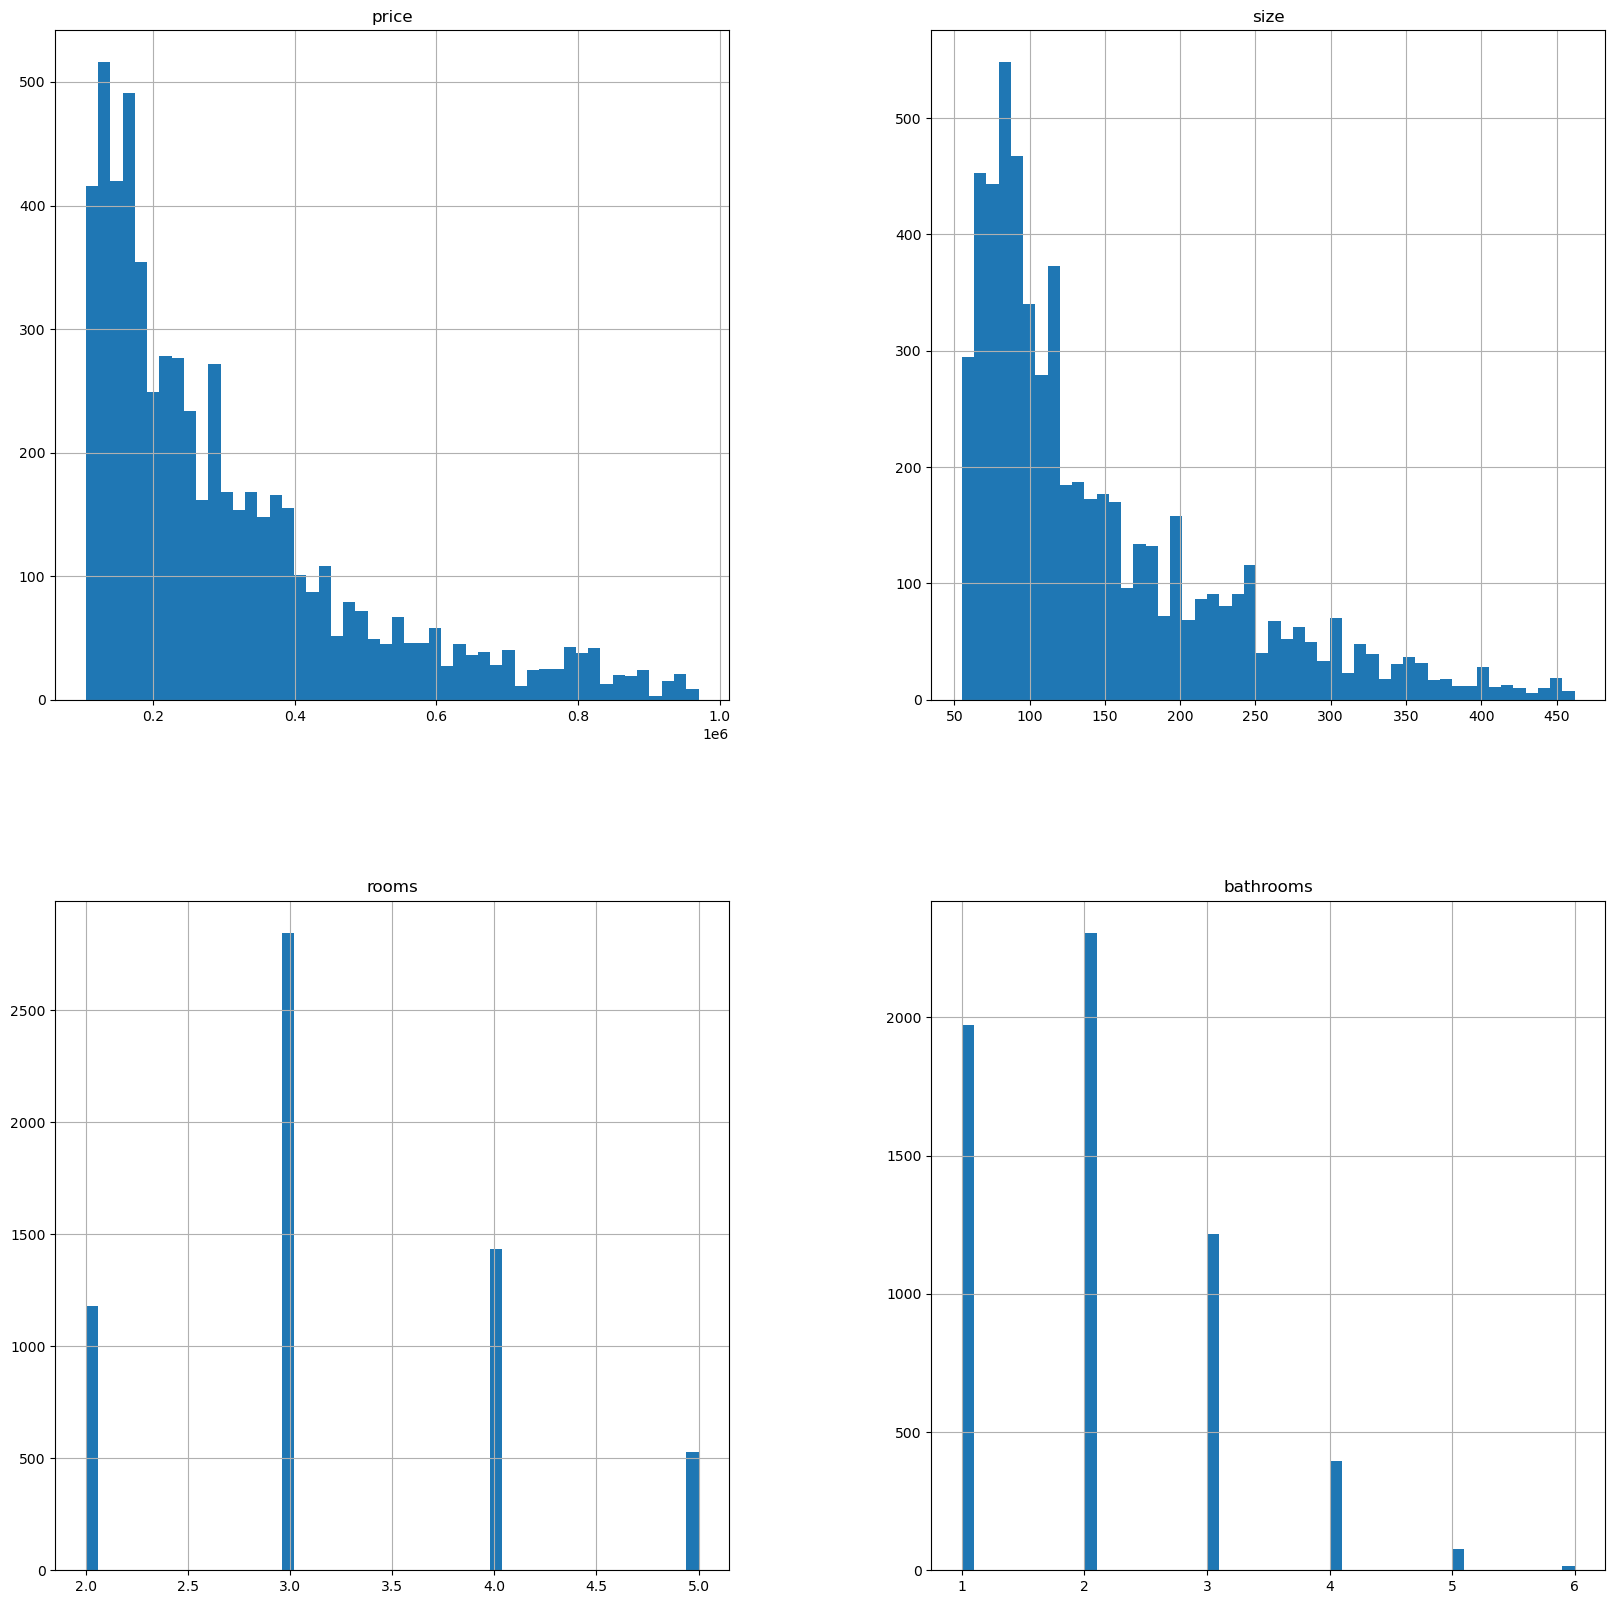

In [929]:
# Plotting the data as histograms
df_cleaned_final.hist(bins=50, figsize=(20, 20))
plt.show()

### The correlation matrix (shows the correlation between various numerical features).

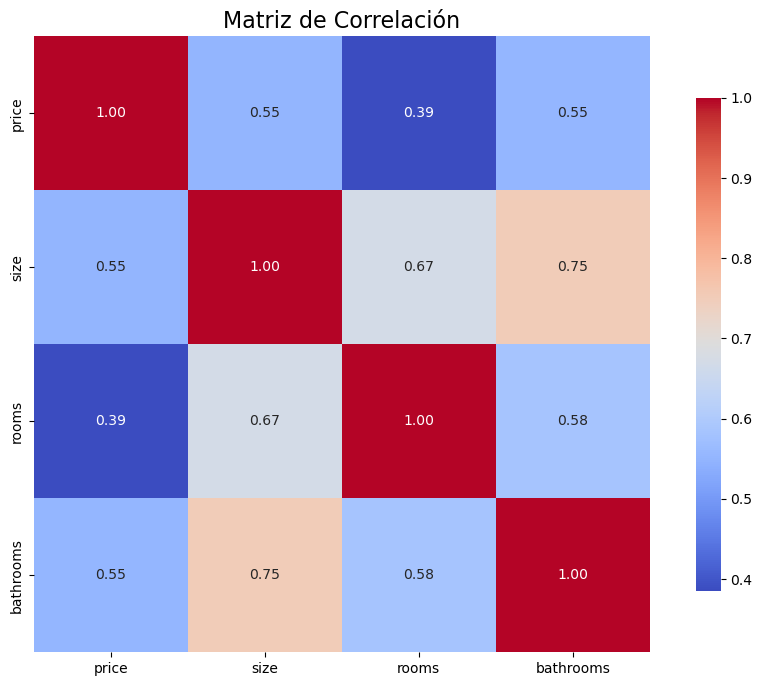

In [930]:
# Filtrar solo columnas numéricas
numeric_df = df_cleaned_final.select_dtypes(include='number')

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un mapa de calor
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, 
            cbar_kws={"shrink": .8})

# Añadir un título
plt.title('Matriz de Correlación', fontsize=16)
plt.show()


In [931]:
# Contar los valores únicos en la columna 'location'
cantidad_valores_unicos = df_cleaned_final['location'].nunique()

# Mostrar la cantidad de valores únicos
print(cantidad_valores_unicos)


472


In [932]:
# Crear variables dummy para las columnas 'type' y 'location'
dummies_type = pd.get_dummies(df_cleaned_final['type'], prefix='type')

# Concatenar las variables dummy al DataFrame original
df_cleaned_final = pd.concat([df_cleaned_final, dummies_type], axis=1)

# Opcionalmente, eliminar las columnas originales 'type' y 'location' si ya no las necesitas
df_cleaned_final.drop(['type'], axis=1, inplace=True)

# Muestra el DataFrame actualizado
print(df_cleaned_final.head())


            location     price   size  rooms  bathrooms  region  type_aticos  \
74019         Centro  225000.0  104.0      4        2.0  madrid        False   
74020           Meco  190500.0  132.0      3        3.0  madrid        False   
74021         Centro  123000.0   75.0      2        1.0  madrid        False   
74022    Moralzarzal  330000.0  135.0      4        2.0  madrid        False   
74023  Núcleo Urbano  199900.0   70.0      2        1.0  madrid        False   

       type_casas  type_duplexs  type_estudios  type_fincas_rusticas  \
74019       False         False          False                 False   
74020       False         False          False                 False   
74021       False         False          False                 False   
74022       False         False          False                 False   
74023       False         False          False                 False   

       type_lofts  type_pisos  
74019       False        True  
74020       False     

### Perform Train Test Split

#### Split the dataset into training and testing sets

In [933]:
# Definir las características (X) y la variable objetivo (y)
X = df_cleaned_final[['size', 'rooms', 'bathrooms', 'type_aticos', 'type_casas', 
                       'type_duplexs', 'type_estudios', 'type_fincas_rusticas', 
                       'type_lofts', 'type_pisos']]

# Aplicar la transformación logarítmica a la variable objetivo
y = np.log(df_cleaned_final['price'])

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Codificar variables categóricas 
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)


### Data Preparation for ML


In [934]:
# Selección de columnas numéricas
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

In [935]:
# Selección de columnas categóricas
X_train_cat = X_train.select_dtypes(exclude=['number'])
X_test_cat = X_test.select_dtypes(exclude=['number'])

In [936]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# Crear DataFrames para X_train y X_test
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_numeric.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_numeric.columns, index=X_test.index)

#Concatenar los datos
X_train_final=pd.concat([X_train_scaled_df, X_train_cat], axis=1)
X_test_final=pd.concat([X_test_scaled_df, X_test_cat], axis=1)


### Linear Regression Model for Price Prediction

In [937]:
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_final, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_final)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

Error Cuadrático Medio (MSE): 0.17
Coeficiente de Determinación (R^2): 0.46


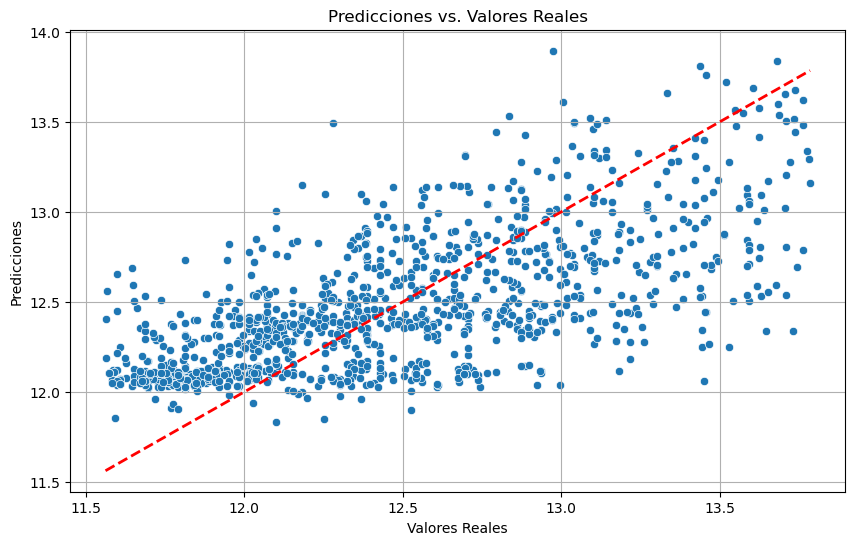

In [938]:
# Gráfico de dispersión de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.grid(True)
plt.show()

### Bagging

In [939]:
# Definir el modelo de Bagging con un estimador base de árbol de decisión
bagging_model = BaggingRegressor(n_estimators=100, estimator=DecisionTreeRegressor(), random_state=42)

# Entrenar el modelo
bagging_model.fit(X_train_final, y_train)

# Hacer predicciones
y_pred_bagging = bagging_model.predict(X_test_final)

# Evaluar el modelo
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
r2_bagging = r2_score(y_test, y_pred_bagging)

# Imprimir las métricas
print(f"MSE Bagging: {mse_bagging:.2f}")
print(f"R^2 Bagging: {r2_bagging:.2f}")

MSE Bagging: 0.15
R^2 Bagging: 0.53


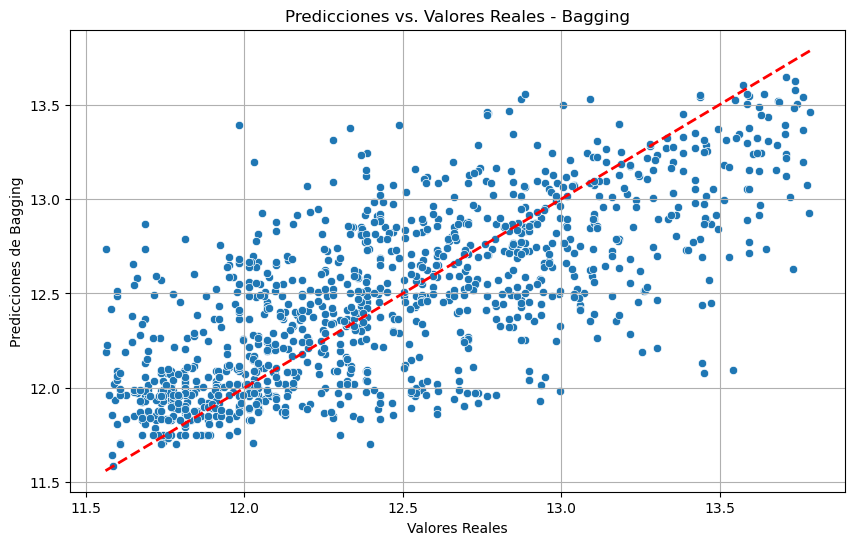

In [940]:
# Gráfico de dispersión de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_bagging)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones de Bagging')
plt.title('Predicciones vs. Valores Reales - Bagging')
plt.grid(True)
plt.show()

### Random Forests

In [941]:
# Crear el modelo de Random Forest
random_forest_model = RandomForestRegressor() 

# Entrenar el modelo con los datos escalados
random_forest_model.fit(X_train_final, y_train)

# Hacer predicciones
y_pred_rf = random_forest_model.predict(X_test_final)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Imprimir las métricas
print(f"MSE Random Forest: {mse_rf:.2f}")
print(f"R^2 Random Forest: {r2_rf:.2f}")

MSE Random Forest: 0.15
R^2 Random Forest: 0.52


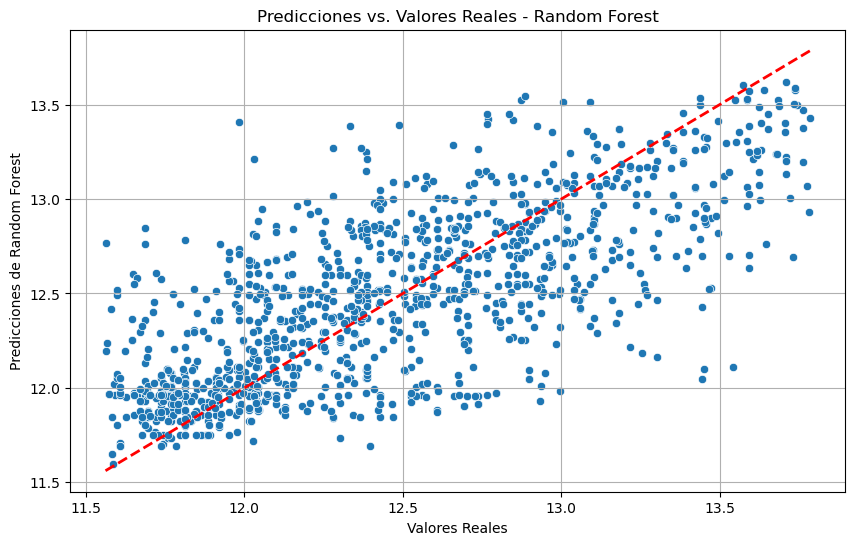

In [942]:
# Gráfico de dispersión de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones de Random Forest')
plt.title('Predicciones vs. Valores Reales - Random Forest')
plt.grid(True)
plt.show()

### Gradient Boosting

In [943]:
# Crear el modelo de Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Entrenar el modelo con los datos escalados
gradient_boosting_model.fit(X_train_final, y_train)

# Hacer predicciones
y_pred_gb = gradient_boosting_model.predict(X_test_final)

# Evaluar el modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Imprimir las métricas
print(f"MSE Gradient Boosting: {mse_gb:.2f}")
print(f"R^2 Gradient Boosting: {r2_gb:.2f}")

MSE Gradient Boosting: 0.15
R^2 Gradient Boosting: 0.51


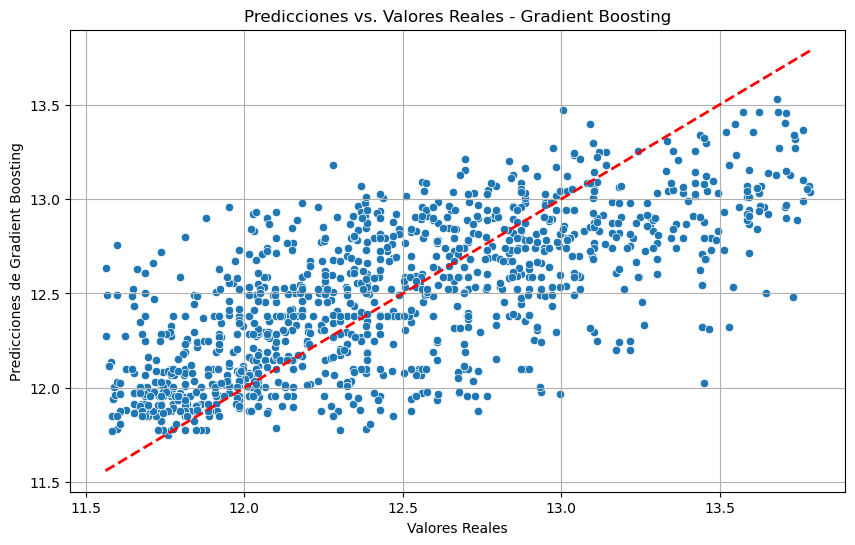

In [944]:
# Gráfico de dispersión de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones de Gradient Boosting')
plt.title('Predicciones vs. Valores Reales - Gradient Boosting')
plt.grid(True)
plt.show()

### Adaptive Boosting (AdaBoost)

In [945]:
# Crear el modelo de AdaBoost
ada_boost_model = AdaBoostRegressor(random_state=42) 

# Entrenar el modelo con los datos escalados
ada_boost_model.fit(X_train_final, y_train)

# Hacer predicciones
y_pred_ada = ada_boost_model.predict(X_test_final)

# Evaluar el modelo
mse_ada = mean_squared_error(y_test, y_pred_ada)
r2_ada = r2_score(y_test, y_pred_ada)

# Imprimir las métricas
print(f"MSE AdaBoost: {mse_ada:.2f}")
print(f"R^2 AdaBoost: {r2_ada:.2f}")

MSE AdaBoost: 0.18
R^2 AdaBoost: 0.43


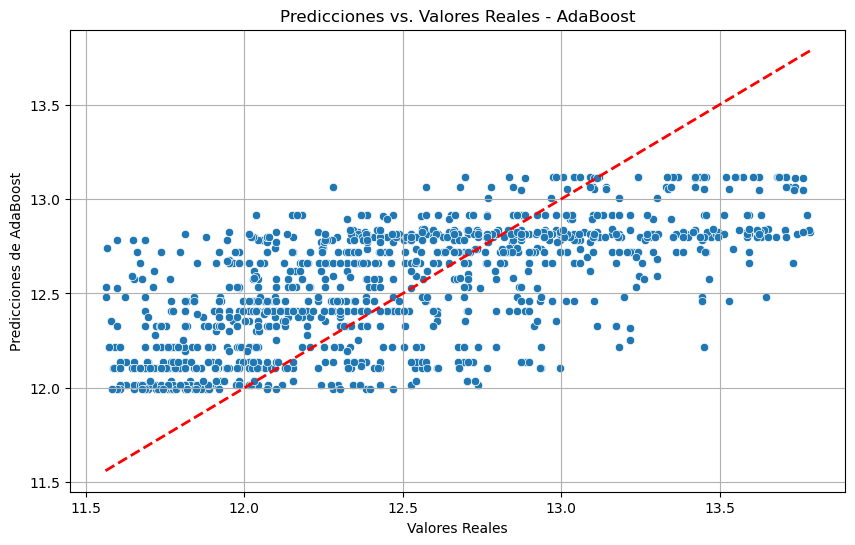

In [946]:
# Gráfico de dispersión de predicciones vs. valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ada)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones de AdaBoost')
plt.title('Predicciones vs. Valores Reales - AdaBoost')
plt.grid(True)
plt.show()


### Mean Absolute Error (MAE) with Scikit-learn 
### This metric helps to understand the overall accuracy of the model’s predictions, where lower values indicate better performance.

In [947]:
# Hacer predicciones 
y_pred = model.predict(X_test_final)  

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir resultados
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")

Error Cuadrático Medio (MSE): 0.17
Coeficiente de Determinación (R^2): 0.46
Error Absoluto Medio (MAE): 0.33


In [948]:
# Inicializar modelos
models = {
    'Regresión Lineal': LinearRegression(),
    'Bagging Regressor': BaggingRegressor(),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42)
}

# Evaluar cada modelo
results = []  # Lista para almacenar los resultados

for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_final, y_train)
    
    # Hacer predicciones
    y_pred = model.predict(X_test_final)
    
    # Calcular métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Imprimir resultados
    print(f"{name}:")
    print(f"  Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"  Coeficiente de Determinación (R^2): {r2:.2f}")
    print(f"  Error Absoluto Medio (MAE): {mae:.2f}")
    print()
    
    # Almacenar resultados
    results.append((name, mse, r2, mae))

Regresión Lineal:
  Error Cuadrático Medio (MSE): 0.17
  Coeficiente de Determinación (R^2): 0.46
  Error Absoluto Medio (MAE): 0.33

Bagging Regressor:
  Error Cuadrático Medio (MSE): 0.15
  Coeficiente de Determinación (R^2): 0.50
  Error Absoluto Medio (MAE): 0.30

Random Forest Regressor:
  Error Cuadrático Medio (MSE): 0.15
  Coeficiente de Determinación (R^2): 0.53
  Error Absoluto Medio (MAE): 0.29

Gradient Boosting Regressor:
  Error Cuadrático Medio (MSE): 0.15
  Coeficiente de Determinación (R^2): 0.51
  Error Absoluto Medio (MAE): 0.31

AdaBoost Regressor:
  Error Cuadrático Medio (MSE): 0.18
  Coeficiente de Determinación (R^2): 0.43
  Error Absoluto Medio (MAE): 0.35



C:\Users\Usuario\AppData\Local\Temp\ipykernel_39952\3980045340.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='MSE', data=results_df, palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39952\3980045340.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='R2', data=results_df, palette='viridis')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_39952\3980045340.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='MAE', data=results_df, palette='viridis')


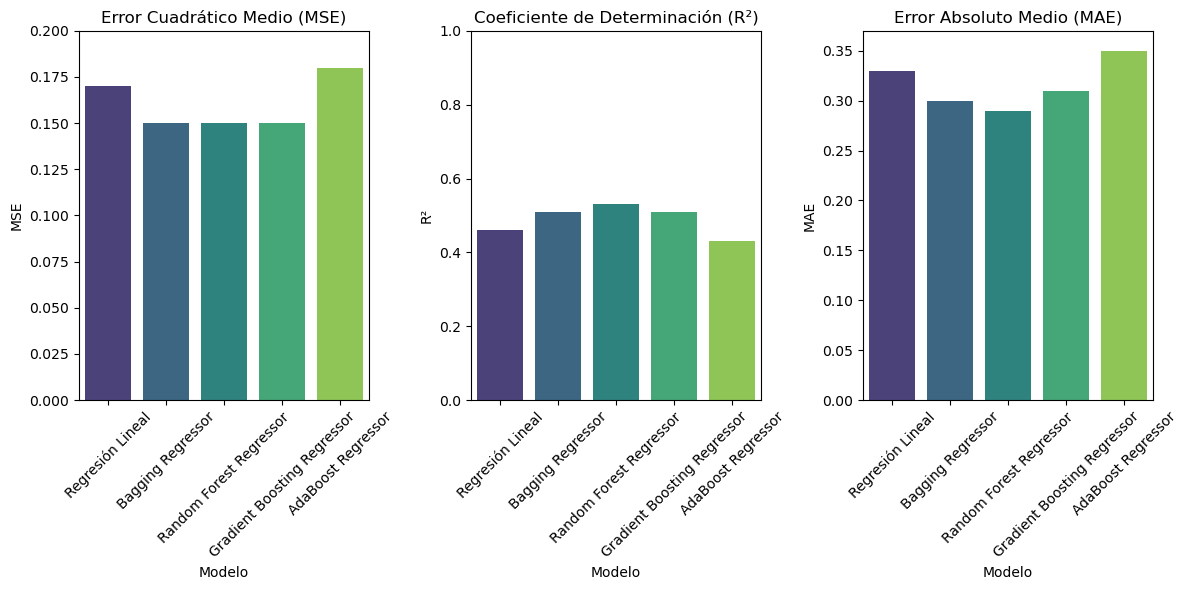

In [949]:
# Datos
data = {
    'Modelo': ['Regresión Lineal', 'Bagging Regressor', 'Random Forest Regressor', 
               'Gradient Boosting Regressor', 'AdaBoost Regressor'],
    'MSE': [0.17, 0.15, 0.15, 0.15, 0.18],
    'R2': [0.46, 0.51, 0.53, 0.51, 0.43],
    'MAE': [0.33, 0.30, 0.29, 0.31, 0.35]
}

# Crear DataFrame
results_df = pd.DataFrame(data)

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para MSE
plt.subplot(1, 3, 1)
sns.barplot(x='Modelo', y='MSE', data=results_df, palette='viridis')
plt.title('Error Cuadrático Medio (MSE)')
plt.xticks(rotation=45)
plt.ylabel('MSE')
plt.ylim(0, max(results_df['MSE']) + 0.02)

# Gráfico de barras para R²
plt.subplot(1, 3, 2)
sns.barplot(x='Modelo', y='R2', data=results_df, palette='viridis')
plt.title('Coeficiente de Determinación (R²)')
plt.xticks(rotation=45)
plt.ylabel('R²')
plt.ylim(0, 1)

# Gráfico de barras para MAE
plt.subplot(1, 3, 3)
sns.barplot(x='Modelo', y='MAE', data=results_df, palette='viridis')
plt.title('Error Absoluto Medio (MAE)')
plt.xticks(rotation=45)
plt.ylabel('MAE')
plt.ylim(0, max(results_df['MAE']) + 0.02)

# Ajustar el diseño
plt.tight_layout()
plt.show()
